In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import repeat

In [2]:
def create_df(dataset, metric, mlp_model, teacher_model):
    x = []
    labels = []
    dpts = []
    
    for i in range(20):
        # active MLP
        filename = dataset+mlp_model+str(i) + '/active_learning.traj'
        active_mlp = pd.read_csv(filename)[metric]
        
        # yoked MLP
        filename = dataset+teacher_model+str(i) + '/active_learning_extra_0.traj'
        yoked = pd.read_csv(filename)[metric]    

        # Passive MLP
        filename = dataset+'-passive-'+str(i) + '/active_learning_extra_1.traj'
        passive_mlp = pd.read_csv(filename)[metric]
        
        for j in range(len(active_mlp)):
            labels.append('Active MLP Default')
            dpts.append(active_mlp[j])

            labels.append('Passive MLP Default')
            dpts.append(passive_mlp[j])

            labels.append('RF Yoked MLP')
            dpts.append(yoked[j])
            
            x.extend(repeat(j, 3))
    
    return x, labels, dpts

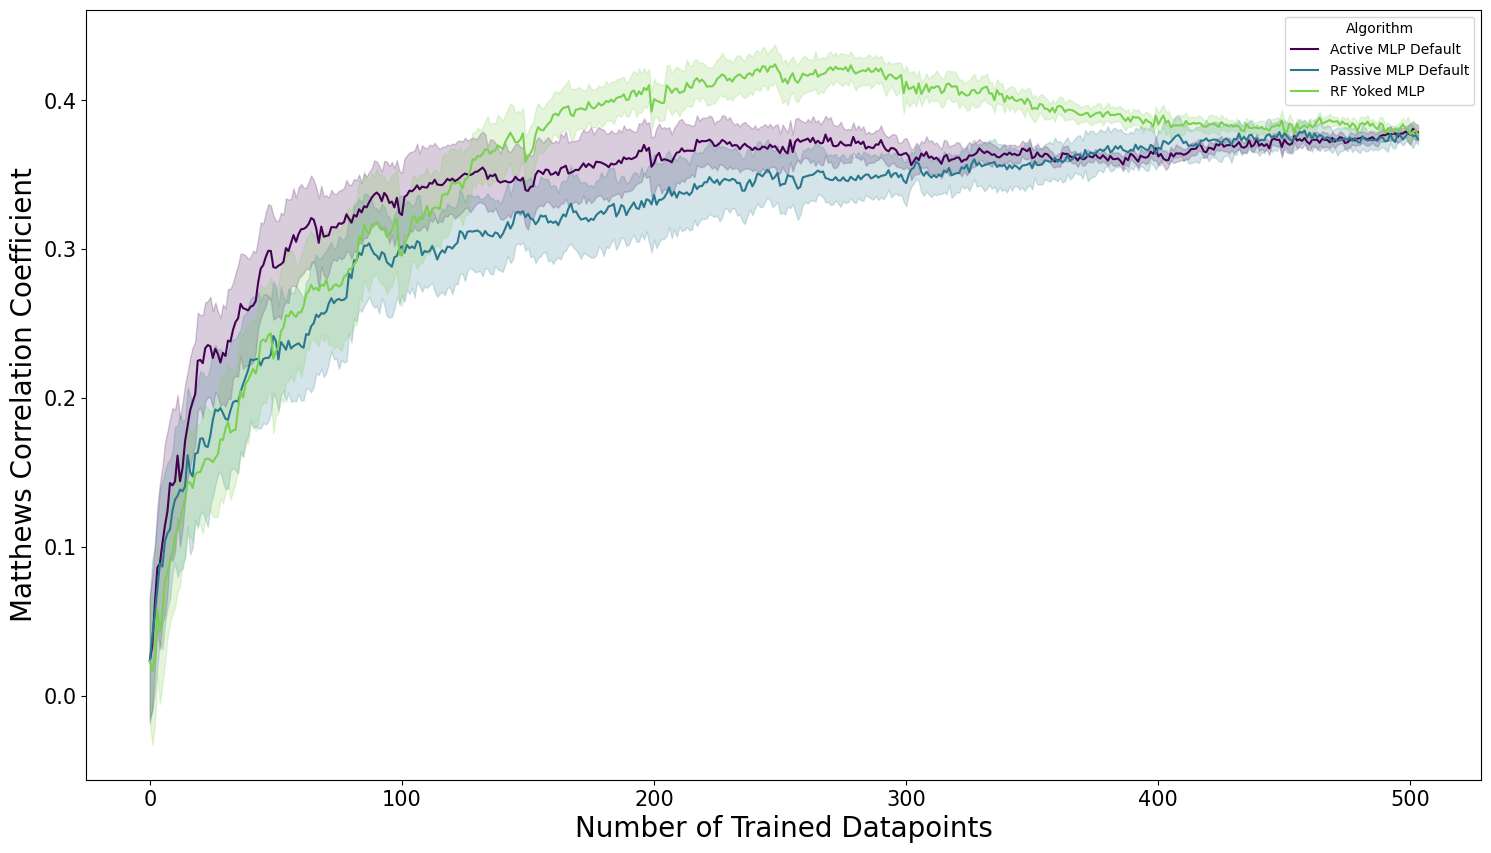

In [9]:
dataset= 'BACE'

# rf with mlp
palette = ['#440154', '#2a788e', '#7ad151' ]

x_axis, labels_df, dpts_df = create_df(dataset, 'mcc', '-mlp-default-', '-rf-')
df = pd.DataFrame({'Datapoints': x_axis, 
                  'Algorithm': labels_df, 
                  'Mattew Correlation Coefficient': dpts_df})

fig, ax = plt.subplots(figsize=(18,10))
sns.lineplot(x='Datapoints', y='Mattew Correlation Coefficient', hue = 'Algorithm',
             palette=palette, data=df, legend='auto')
ax.set_xlabel('Number of Trained Datapoints', fontsize = 20)
ax.set_ylabel('Matthews Correlation Coefficient', fontsize = 20)

plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=15)